In [5]:
class Domain:
    def __init__(self) -> None:
        self.value = 4
    
    def increment_time(self):
        self.value += 1

class Field:
    def __init__(self,d) -> None:
        self.domain = d


d = Domain()

d.step_time()

d.value
d.step_time()

d.value

6

In [10]:
class Test(Exception):
    def __init__(self,message):
        self.message = message



def myfunc():
    raise Test("boop")

try:
    myfunc()
except Test as e:
    raise Exception("test error")
finally:
    raise Exception("something else")





Exception: something else

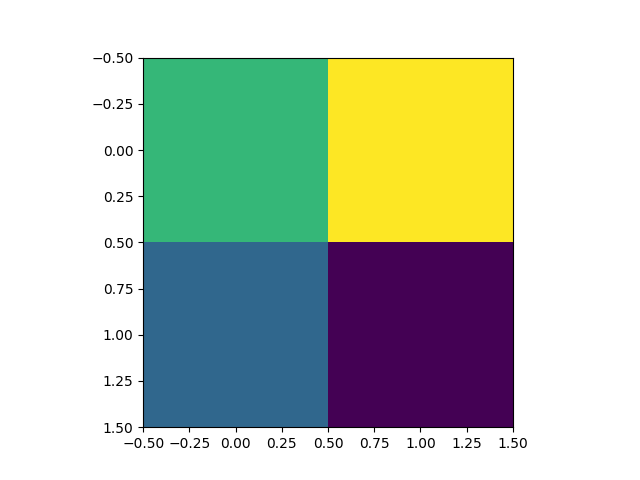

In [28]:
%matplotlib widget

values = np.array(0,1,)

In [93]:
import scipy
import numpy as np
import time

n = 1000


data = np.matrix(np.linspace(0,1,n)).transpose()
kernel = np.matrix([1,-2,1]).transpose()


M = np.zeros((n+2,n))

for i in range(n+4):
    for j in range(len(kernel)):

        val = kernel[j]

        col_idx = j+i-2

        if col_idx>=0 and col_idx<n:
            M[i,j+i-2] = val

n_times = 10000

start = time.time()

for i in range(n_times):
    M@data

mid = time.time()

for i in range(n_times):
    scipy.signal.convolve(data,kernel,mode='valid')

end = time.time()

print(mid-start)
print(end-mid)


1.1940085887908936
0.784233808517456


In [103]:
import scipy
import numpy as np
import time

n = 4


data = np.matrix(np.linspace(0,1,n))
kernel = np.matrix([1,-2,1])


print(scipy.signal.convolve(data,kernel))

print(scipy.signal.convolve(data,kernel,mode='valid'))

[[ 0.          0.33333333  0.          0.         -1.33333333  1.        ]]
[[0. 0.]]
